In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [6]:
# Loading the dataset

df = pd.read_csv("../archive/Position_Salaries.csv")

In [7]:
# Understanding the datastypes
df.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [8]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [9]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [10]:
df.round(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [11]:
# Making the Xs and y variables
y = df['Salary']

Xs = df.drop(['Salary', 'Position'], axis=1)

### Model

In [13]:
# Fitting the SVRegression model to the training set

from sklearn.svm import SVR
regressor = SVR()

In [14]:
# Will be creating a dictionary to store all the values for the potential parameters

from collections import defaultdict
d = defaultdict(list)

In [15]:
# There are a couple of kernels that can work in the problem (let's try them all)
# the possible 'linear', 'poly', 'rbf', 'sigmoid'

regressions = defaultdict(list)
possible_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for ker in possible_kernels:
    
    regressor = SVR(kernel=ker)
    regressor.fit(Xs, y)
    
    regressions[ker].append(regressor)

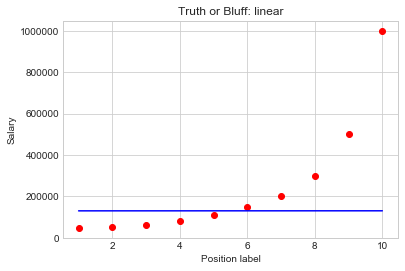

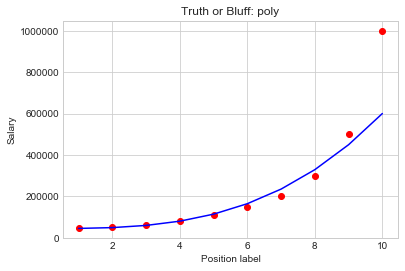

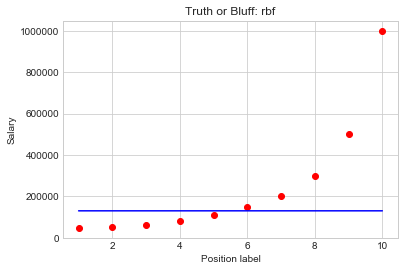

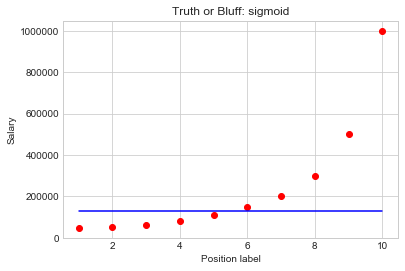

In [17]:
# Graphing all the results
for ker in possible_kernels:
    
    plt.scatter(Xs, y, c='red')
    plt.plot(Xs, regressions[ker][0].predict(Xs), c='blue')
    plt.title("Truth or Bluff: {0}".format(ker))
    plt.xlabel('Position label')
    plt.ylabel('Salary')
    plt.show()


- The thing with the model is that for SVM, it does not include feature scaling. This is because a less common model

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

# Creating the fitting
Xs = sc_X.fit_transform(Xs)
y = sc_y.fit_transform(y.reshape(-1, 1))

In [24]:
# There are a couple of kernels that can work in the problem (let's try them all)
# the possible 'linear', 'poly', 'rbf', 'sigmoid'
  
regressions_2 = defaultdict(list)

for ker in possible_kernels:
    
    regressor = SVR(kernel=ker)
    regressor.fit(Xs, y.ravel())
    regressions_2[ker].append(regressor)

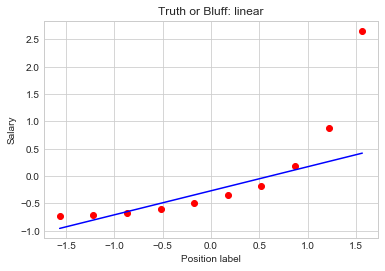

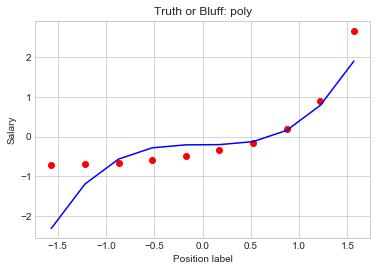

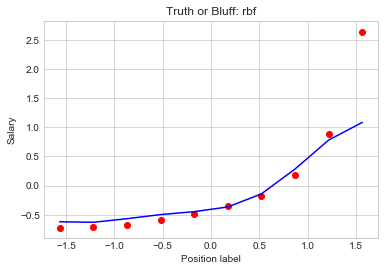

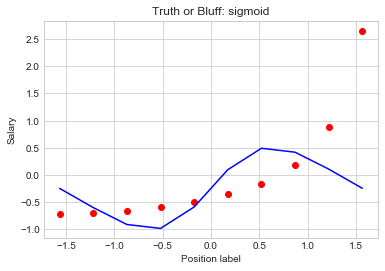

In [26]:
# Graphing all the results
for ker in possible_kernels:
    
    plt.scatter(Xs, y, c='red')
    plt.plot(Xs, regressions_2[ker][0].predict(Xs), c='blue')
    plt.title("Truth or Bluff: {0}".format(ker))
    plt.xlabel('Position label')
    plt.ylabel('Salary')
    plt.show()

In [29]:
# to predict for 6.5, remember that you scale this too
for ker in possible_kernels:
    y_pred = sc_y.inverse_transform(regressions_2[ker][0].predict(sc_X.transform(np.array([[6.5]]))))
    print("{0} predicts a salary of ${1:.2f}".format(ker, y_pred[0]))


linear predicts a salary of $2.59
poly predicts a salary of $149.88
rbf predicts a salary of $0.01
sigmoid predicts a salary of $-1.93
